In [438]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas
import numpy as np
import time
import seaborn as sns

pd.set_option('display.max_columns',75)

In [371]:
df = pd.read_csv('../datasets/percent_sales.csv',index_col=0)

In [372]:
df = df.drop(columns=['City','State','Metro'])
# df = df[df.sale_date!='nan']
df = df.dropna(subset=['sale_date'])
df = df.fillna(0)

In [373]:
def rename_cols(df):
    new_cols = []
    for c in df.columns[0:4]:
        new_cols.append(c)
    for c in df.columns[4:-14]:
        d = c.split(' ')[0][:-3]
        new_cols.append(d)
    for c in df.columns[-14:]:
        new_cols.append(c)
    df.columns = new_cols

In [374]:
rename_cols(df)

In [375]:
def rename_sale_date(df):
    sale_dates = list(df.sale_date)
    new_dates = []
    for date in sale_dates:
        new_dates.append(str(date)[:7])
    df.sale_date = new_dates

In [376]:
rename_sale_date(df)

In [377]:
#df.sale_date = pd.to_datetime(df.sale_date)

In [378]:
df.columns

Index(['RegionID', 'neighborhood', 'CountyName', 'SizeRank', '2014-01',
       '2014-02', '2014-03', '2014-04', '2014-05', '2014-06', '2014-07',
       '2014-08', '2014-09', '2014-10', '2014-11', '2014-12', '2015-01',
       '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07',
       '2015-08', '2015-09', '2015-10', '2015-11', '2015-12', '2016-01',
       '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07',
       '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01',
       '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07',
       '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01',
       '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07',
       'borough', 'building_class_category', 'block', 'address',
       'apartment_number', 'zip_code', 'residential_units', 'commercial_units',
       'total_units', 'land_square_feet', 'gross_square_feet', 'year_built',
       'sale_price', 'sale_date'],
      dtype='o

In [399]:
def get_rent_estimates(df):
    rent_estimates = []
    start=time.time()
    for index, row in df.iterrows():
        for col in df.columns:
            if row.sale_date==row[col]:  
                rent_estimate = row.sale_price/row[row.sale_date]/12
                rent_estimates.append(round(rent_estimate))
        if (index+1)%1000 == 0:
            print('Runtime: {} seconds. Row: {}'.format(round(time.time()-start,2),index+1))
    print('\nTotal runtime: {} seconds'.format(round(time.time()-start,2)))
    return rent_estimates

In [400]:
re = get_rent_estimates(df)

Runtime: 2.77 seconds. Row: 1000
Runtime: 5.41 seconds. Row: 2000
Runtime: 8.02 seconds. Row: 3000
Runtime: 10.66 seconds. Row: 4000
Runtime: 13.36 seconds. Row: 5000
Runtime: 17.07 seconds. Row: 6000

Total runtime: 19.82 seconds


In [401]:
df['rent_estimate'] = re

In [402]:
df.head()

,RegionID,neighborhood,CountyName,SizeRank,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,borough,building_class_category,block,address,apartment_number,zip_code,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,sale_price,sale_date,rent_estimate
0,270958,upper west side,New York,3,23.74,23.82,24.08,25.4,25.92,26.22,25.96,25.39,25.13,24.57,24.81,24.74,24.85,24.73,25.21,24.92,25.6,25.66,26.09,26.55,26.66,25.7,25.07,23.08,23.28,23.23,23.18,22.63,22.67,23.6,24.47,25.34,25.9,25.7,25.71,25.69,25.55,25.34,25.38,25.25,26.43,26.98,26.93,26.88,26.57,28.3,27.99,28.0,27.56,27.05,26.27,26.16,26.06,25.64,25.58,1.0,12 CONDOS - WALKUP APARTMENTS,1840.0,15 WEST 104 STREET,0,10025.0,1.0,0.0,1.0,0.0,0.0,1986.0,1115000.0,2014-03,3859
1,270958,upper west side,New York,3,23.74,23.82,24.08,25.4,25.92,26.22,25.96,25.39,25.13,24.57,24.81,24.74,24.85,24.73,25.21,24.92,25.6,25.66,26.09,26.55,26.66,25.7,25.07,23.08,23.28,23.23,23.18,22.63,22.67,23.6,24.47,25.34,25.9,25.7,25.71,25.69,25.55,25.34,25.38,25.25,26.43,26.98,26.93,26.88,26.57,28.3,27.99,28.0,27.56,27.05,26.27,26.16,26.06,25.64,25.58,1.0,12 CONDOS - WALKUP APARTMENTS,1840.0,48 WEST 105 STREET,0,10025.0,1.0,0.0,1.0,0.0,0.0,1986.0,738000.0,2014-09,2447
2,270958,upper west side,New York,3,23.74,23.82,24.08,25.4,25.92,26.22,25.96,25.39,25.13,24.57,24.81,24.74,24.85,24.73,25.21,24.92,25.6,25.66,26.09,26.55,26.66,25.7,25.07,23.08,23.28,23.23,23.18,22.63,22.67,23.6,24.47,25.34,25.9,25.7,25.71,25.69,25.55,25.34,25.38,25.25,26.43,26.98,26.93,26.88,26.57,28.3,27.99,28.0,27.56,27.05,26.27,26.16,26.06,25.64,25.58,1.0,12 CONDOS - WALKUP APARTMENTS,1840.0,100 MANHATTAN AVENUE,0,10025.0,1.0,0.0,1.0,0.0,0.0,1986.0,925000.0,2014-02,3236
3,270958,upper west side,New York,3,23.74,23.82,24.08,25.4,25.92,26.22,25.96,25.39,25.13,24.57,24.81,24.74,24.85,24.73,25.21,24.92,25.6,25.66,26.09,26.55,26.66,25.7,25.07,23.08,23.28,23.23,23.18,22.63,22.67,23.6,24.47,25.34,25.9,25.7,25.71,25.69,25.55,25.34,25.38,25.25,26.43,26.98,26.93,26.88,26.57,28.3,27.99,28.0,27.56,27.05,26.27,26.16,26.06,25.64,25.58,1.0,12 CONDOS - WALKUP APARTMENTS,1840.0,100 MANHATTAN AVENUE,0,10025.0,1.0,0.0,1.0,0.0,0.0,1986.0,1080000.0,2014-10,3663
4,270958,upper west side,New York,3,23.74,23.82,24.08,25.4,25.92,26.22,25.96,25.39,25.13,24.57,24.81,24.74,24.85,24.73,25.21,24.92,25.6,25.66,26.09,26.55,26.66,25.7,25.07,23.08,23.28,23.23,23.18,22.63,22.67,23.6,24.47,25.34,25.9,25.7,25.71,25.69,25.55,25.34,25.38,25.25,26.43,26.98,26.93,26.88,26.57,28.3,27.99,28.0,27.56,27.05,26.27,26.16,26.06,25.64,25.58,1.0,12 CONDOS - WALKUP APARTMENTS,1840.0,110 MANHATTAN AVENUE,0,10025.0,1.0,0.0,1.0,0.0,0.0,1986.0,1150000.0,2014-11,3863


In [415]:
df.rent_estimate.describe()

count    6.724000e+03
mean     1.357856e+04
std      1.077598e+05
min      3.030000e+02
25%      2.827000e+03
50%      4.846500e+03
75%      8.966000e+03
max      6.532288e+06
Name: rent_estimate, dtype: float64

In [426]:
df.rent_estimate[(df.rent_estimate<10000) & (df.rent_estimate>1000)].describe()

count    5069.000000
mean     4429.289406
std      2230.367149
min      1005.000000
25%      2612.000000
50%      3888.000000
75%      5958.000000
max      9982.000000
Name: rent_estimate, dtype: float64

In [422]:
df['2018-07'].describe()

count    6724.000000
mean       25.329613
std         1.576486
min        22.580000
25%        25.060000
50%        25.070000
75%        25.600000
max        32.030000
Name: 2018-07, dtype: float64

In [452]:
df.sale_price.describe()

count    6.724000e+03
mean     4.072095e+06
std      3.389776e+07
min      1.009170e+05
25%      8.000000e+05
50%      1.386000e+06
75%      2.608750e+06
max      2.100000e+09
Name: sale_price, dtype: float64

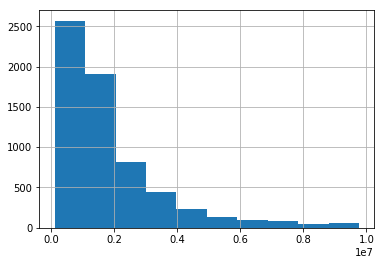

In [456]:
df.sale_price[df.sale_price<10000000].hist();

In [457]:
df.sale_price.describe()

count    6.724000e+03
mean     4.072095e+06
std      3.389776e+07
min      1.009170e+05
25%      8.000000e+05
50%      1.386000e+06
75%      2.608750e+06
max      2.100000e+09
Name: sale_price, dtype: float64

In [465]:
df[df.sale_price<10000000].describe()

,RegionID,SizeRank,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,borough,block,zip_code,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,sale_price,rent_estimate
count,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.0,6398.000000,6398.000000,6398.000000,6398.000000,6398.0,6398.000000,6398.000000,6398.000000,6.398000e+03,6398.000000
mean,270145.248515,309.217255,23.501363,23.531905,23.515330,24.688003,25.228478,25.078986,25.039053,24.783101,24.310252,23.698595,23.852799,23.936672,24.260722,24.473976,24.868009,24.770300,25.435028,25.513759,25.723337,25.959970,26.007068,25.277915,24.882952,22.865753,23.181275,23.255125,23.434877,23.172429,21.799361,22.417344,23.138556,23.781411,24.262221,24.144331,24.246855,24.276175,24.251760,24.092366,24.338135,24.259681,25.136572,25.798215,25.990119,25.818085,25.463789,26.953118,26.617385,26.702293,26.491218,26.155092,25.606926,25.595191,25.650603,25.360184,25.324384,1.0,1009.140513,10032.572366,0.948109,0.008596,1.0,32.629259,70.748203,1505.542513,1.886449e+06,6458.054548
std,29867.781324,354.997433,4.260006,4.337404,4.213629,4.332848,4.257763,4.055577,4.103668,3.899085,3.485561,3.229128,3.216182,3.141329,3.004276,2.941975,2.941860,2.576019,2.739914,2.554858,2.246606,2.095708,2.041716,1.979689,2.012377,2.061742,1.937255,2.004011,1.880449,1.758839,2.321535,2.374836,2.460859,2.588386,2.546305,2.461153,2.287474,2.189306,2.162739,2.051424,1.924767,1.786847,1.725506,1.777231,1.802901,1.639341,1.634201,1.908659,1.864390,1.863592,1.803224,1.732621,1.627330,1.561163,1.476596,1.530033,1.593745,0.0,563.032755,48.258605,0.221825,0.092325,0.0,305.135218,698.273245,835.733667,1.697202e+06,5635.505431
min,193821.000000,3.000000,16.800000,16.630000,16.340000,18.280000,17.870000,17.870000,17.660000,17.940000,17.850000,17.560000,17.660000,17.370000,17.530000,17.810000,18.680000,18.770000,18.950000,19.730000,19.770000,19.940000,19.340000,20.410000,20.730000,17.800000,18.240000,19.000000,19.310000,19.110000,14.660000,14.990000,15.660000,16.240000,16.450000,16.180000,16.610000,16.620000,16.830000,16.900000,17.570000,18.130000,20.610000,22.240000,22.400000,22.480000,22.260000,22.950000,22.760000,23.030000,23.180000,22.960000,22.720000,22.810000,22.960000,22.650000,22.580000,1.0,15.000000,10001.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.009170e+05,303.000000
25%,270835.000000,6.000000,20.900000,20.630000,20.870000,21.670000,22.630000,22.040000,22.140000,22.150000,22.430000,22.060000,22.140000,22.490000,22.890000,23.280000,23.470000,23.320000,23.920000,24.300000,24.790000,25.240000,25.700000,24.970000,24.490000,22.240000,22.640000,22.520000,22.740000,22.630000,20.950000,21.730000,21.770000,21.920000,22.480000,22.820000,22.950000,23.010000,23.160000,23.440000,23.940000,24.090000,24.910000,26.040000,25.980000,25.880000,25.460000,26.770000,26.700000,26.560000,25.970000,25.350000,25.090000,25.080000,24.910000,24.750000,25.060000,1.0,621.000000,10

In [467]:
df[df.commercial_units>0]

,RegionID,neighborhood,CountyName,SizeRank,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,borough,building_class_category,block,address,apartment_number,zip_code,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,sale_price,sale_date,rent_estimate
659,270958,upper west side,New York,3,23.74,23.82,24.08,25.40,25.92,26.22,25.96,25.39,25.13,24.57,24.81,24.74,24.85,24.73,25.21,24.92,25.60,25.66,26.09,26.55,26.66,25.70,25.07,23.08,23.28,23.23,23.18,22.63,22.67,23.60,24.47,25.34,25.90,25.70,25.71,25.69,25.55,25.34,25.38,25.25,26.43,26.98,26.93,26.88,26.57,28.30,27.99,28.00,27.56,27.05,26.27,26.16,26.06,25.64,25.58,1.0,21 OFFICE BUILDINGS,1118.0,36 WEST 66TH STREET,0,10023.0,0.0,1.0,1.0,2510.0,5130.0,1910.0,85000000.0,2014-03,294158
660,270958,upper west side,New York,3,23.74,23.82,24.08,25.40,25.92,26.22,25.96,25.39,25.13,24.57,24.81,24.74,24.85,24.73,25.21,24.92,25.60,25.66,26.09,26.55,26.66,25.70,25.07,23.08,23.28,23.23,23.18,22.63,22.67,23.60,24.47,25.34,25.90,25.70,25.71,25.69,25.55,25.34,25.38,25.25,26.43,26.98,26.93,26.88,26.57,28.30,27.99,28.00,27.56,27.05,26.27,26.16,26.06,25.64,25.58,1.0,29 COMMERCIAL GARAGES,1169.0,219 WEST 77TH STREET,0,10024.0,0.0,1.0,1.0,7663.0,41850.0,1917.0,63000000.0,2014-10,213675
1027,270958,upper west side,New York,3,23.74,23.82,24.08,25.40,25.92,26.22,25.96,25.39,25.13,24.57,24.81,24.74,24.85,24.73,25.21,24.92,25.60,25.66,26.09,26.55,26.66,25.70,25.07,23.08,23.28,23.23,23.18,22.63,22.67,23.60,24.47,25.34,25.90,25.70,25.71,25.69,25.55,25.34,25.38,25.25,26.43,26.98,26.93,26.88,26.57,28.30,27.99,28.00,27.56,27.05,26.27,26.16,26.06,25.64,25.58,1.0,21 OFFICE BUILDINGS,1231.0,204 WEST 84TH STREET,0,10024.0,0.0,1.0,1.0,2554.0,6150.0,1910.0,8500000.0,2014-12,28631
1028,270958,upper west side,New York,3,23.74,23.82,24.08,25.40,25.92,26.22,25.96,25.39,25.13,24.57,24.81,24.74,24.85,24.73,25.21,24.92,25.60,25.66,26.09,26.55,26.66,25.70,25.07,23.08,23.28,23.23,23.18,22.63,22.67,23.60,24.47,25.34,25.90,25.70,25.71,25.69,25.55,25.34,25.38,25.25,26.43,26.98,26.93,26.88,26.57,28.30,27.99,28.00,27.56,27.05,26.27,26.16,26.06,25.64,25.58,1.0,26 OTHER HOTELS,1242.0,206 WEST 95TH STREET,0,10025.0,0.0,1.0,1.0,6025.0,25704.0,1908.0,15000000.0,2014-08,49232
1029,270958,upper west side,New York,3,23.74,23.82,24.08,25.40,25.92,26.22,25.96,25.39,25.13,24.57,24.81,24.74,24.85,24.73,25.21,24.92,25.60,25.66,26.09,26.55,26.66,25.70,25.07,23.08,23.28,23.23,23.18,22.63,22.67,23.60,24.47,25.34,25.90,25.70,25.71,25.69,25.55,25.34,25.38,25.25,26.43,26.98,26.93,26.88,26.57,28.30,27.99,28.00,27.56,27.05,26.27,26.16,26.06,25.64,25.58,1.0,26 OTHER HOTELS,1252.0,307 WEST 93RD STREET,0,10025.0,0.0,1.0,1.0,5033.0,21864.0,1910.0,7000000.0,2014-01,24572
1030,270958,upper west side,New York,3,23.74,23.82,24.08,25.40,25.92,26.22,25.96,25.39,25.13,24.57,24.81,24.74,24.85,24.73,25.21,24.92,25.60,25.66,26.09,26.55,26.66,25.70,25.07,23.08,23.28,23.23,23.18,22.63,22.67,23.60,24.47,25.34,25.90,25.70,25.71,25.69,25.55,25.34,25.38,25.25,26.43,26.98,26.93,26.88,26.57,28.30,27.99,28.00,27.56,27.05,26.27,26.16,26.06,25.64,25.58,1.0,33 EDUCATIONAL FACILITIES,1213.0,132 WEST 83RD STREET,0,10024.0,0.0,1.0,1.0,1660.0,4198.0,1900.0,9700000.0,2014-07,31138
1670,270957,upper east side,New York,6,23.47,23.46,23.54,25.22,25.94,25.79,25.62,25.42,24.56,23.77,24.07,23.65,24.15,24.30,24.52,24.46,25.19,25.23,25.46,26.36,26.19,24.97,24.49,22.40,22.64,22.52,22.74,22.67,21.24,21.90,22.85,23.49,24.03,23.90,24.02,23.94,23.93,23.68,23.99,24.09,25.00,26.16,26.72,26.49,26.20,27.83,27.41,27.46,27.03,26.53,25.83,25.73,25.47,25.10,25.07,1.0,16 CONDOS -

In [503]:
test_df = df.copy()

In [504]:
test_df = test_df.drop(columns = ['RegionID', 'CountyName', 'SizeRank', '2014-01',
       '2014-02', '2014-03', '2014-04', '2014-05', '2014-06', '2014-07',
       '2014-08', '2014-09', '2014-10', '2014-11', '2014-12', '2015-01',
       '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07',
       '2015-08', '2015-09', '2015-10', '2015-11', '2015-12', '2016-01',
       '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07',
       '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01',
       '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07',
       '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01',
       '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07',
       'borough', 'building_class_category', 'block',
       'apartment_number', 'residential_units', 'commercial_units',
       'total_units', 'land_square_feet', 'gross_square_feet', 'year_built'])

In [505]:
test_df.sale_date = pd.to_datetime(test_df.sale_date)

In [506]:
test_df.sale_date.asfreq('M')
test_df = test_df.set_index(test_df.sale_date,drop=True)
test_df = test_df.drop(columns=['sale_date'])

/Users/SamLiebman/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/datetimes.py:574: UserWarning: Discarding nonzero nanoseconds in conversion
  index = _generate_regular_range(start, end, periods, freq)


In [507]:
test_df.head()

,neighborhood,address,zip_code,sale_price,rent_estimate
sale_date,,,,,
2014-03-01,upper west side,15 WEST 104 STREET,10025.0,1115000.0,3859
2014-09-01,upper west side,48 WEST 105 STREET,10025.0,738000.0,2447
2014-02-01,upper west side,100 MANHATTAN AVENUE,10025.0,925000.0,3236
2014-10-01,upper west side,100 MANHATTAN AVENUE,10025.0,1080000.0,3663
2014-11-01,upper west side,110 MANHATTAN AVENUE,10025.0,1150000.0,3863


In [510]:
test_df.plot(x=test_df.sale_date,y=test_df.rent_estimate)

AttributeError: 'DataFrame' object has no attribute 'sale_date'